# Data Treatment and Pre-processing

In [41]:
#import library packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error , r2_score , mean_absolute_error
import xgboost as xgb

In [42]:
import warnings
warnings.filterwarnings("ignore")

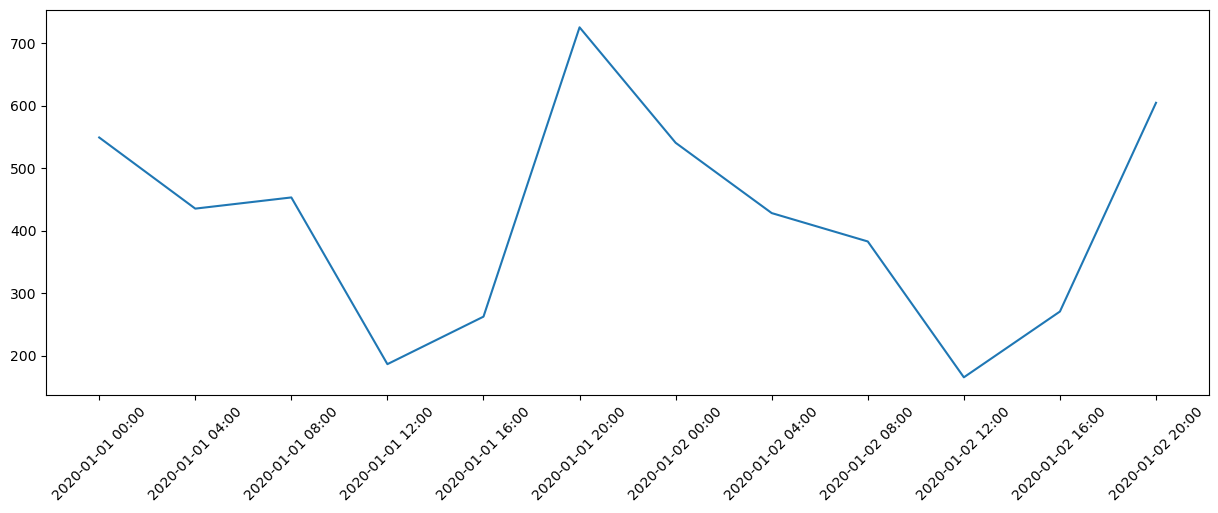

In [43]:
#load the given air pollution dataset
df = pd.read_csv("dataset.csv")
dt = df.copy()
submission = pd.read_excel("Round1a_Submission_Template.xlsx")
df.head()
plt.figure(figsize=(15 , 5))
plt.plot(df['Time Periods'].head(12) , df['PM2.5'].head(12))
plt.xticks(rotation=45)
plt.show()

In [44]:
# # dt = dt.dropna()
# plt.figure(figsize=(25 , 10))
# dt.reset_index()
# p1 , p2 ='PM2.5' , 'NO2'
# sns.jointplot(x=p1, y=p2, data = dt , kind='reg')

Plotting for PM2.5 and NO2, we see a fairly positively sloped line indicating that the two pollutants move simultaneously

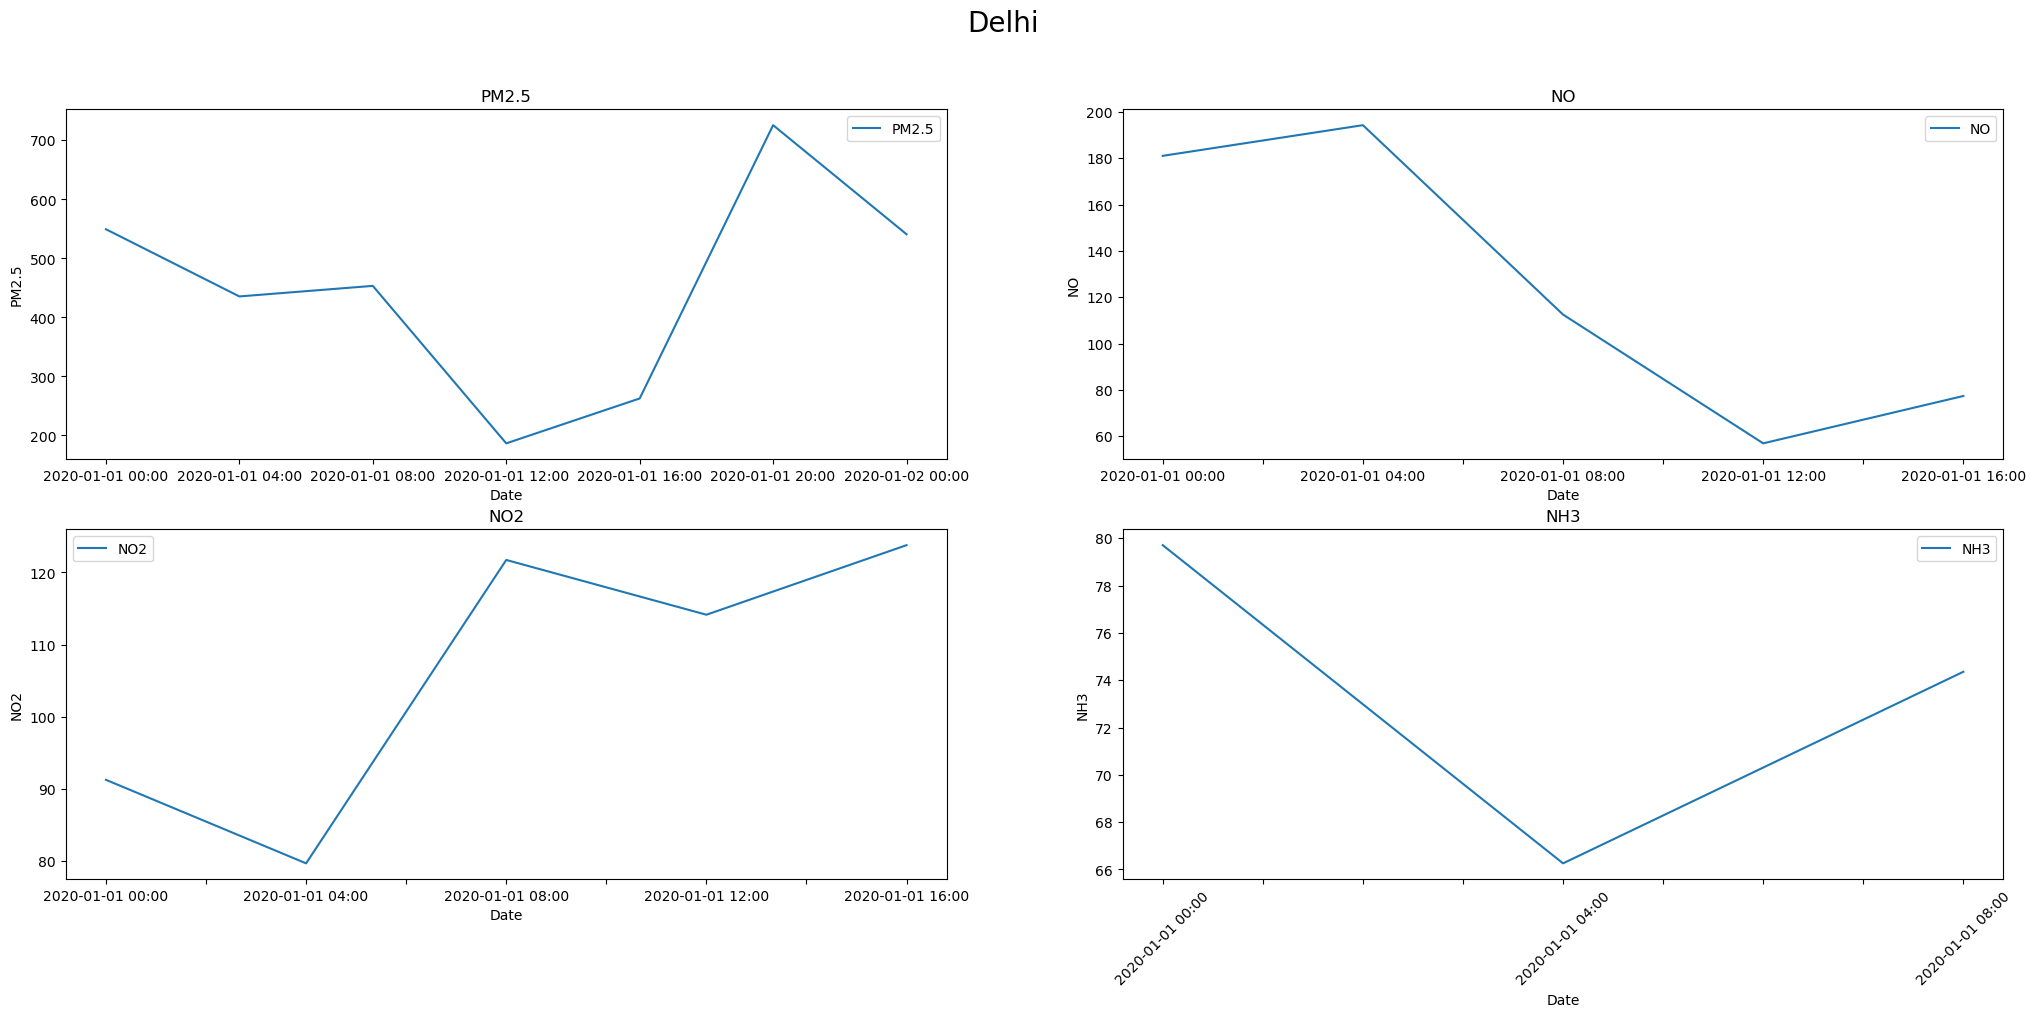

In [45]:
fig , ax = plt.subplots(2 ,2 , figsize=(25 , 10))
fig.suptitle('Delhi', size=20)
data = df[df['City'] == 'Delhi']
data = data.iloc[:7]
data = data.set_index(data['Time Periods'] , drop = True)

data['PM2.5'].plot(legend=True, ax=ax[0][0], title="PM2.5")
ax[0][0].set_ylabel('PM2.5')
ax[0][0].set_xlabel("Date")



data['NO'].plot(legend=True, ax=ax[0][1], title="NO")
ax[0][1].set_ylabel('NO')
ax[0][1].set_xlabel("Date")


data['NO2'].plot(legend=True, ax=ax[1][0], title="NO2")
ax[1][0].set_ylabel('NO2')
ax[1][0].set_xlabel("Date")


data['NH3'].plot(legend=True, ax=ax[1][1], title="NH3")
ax[1][1].set_ylabel('NH3')
ax[1][1].set_xlabel("Date")

plt.xticks(rotation=45)
plt.show()

The pollutants (Pm2.5 and NO2) saw an increasing trend from evening to midnight while decreasing in the remaining period of the day
The following analysis was opposite in case of NO and Nh3

### Visualisation of main dataset

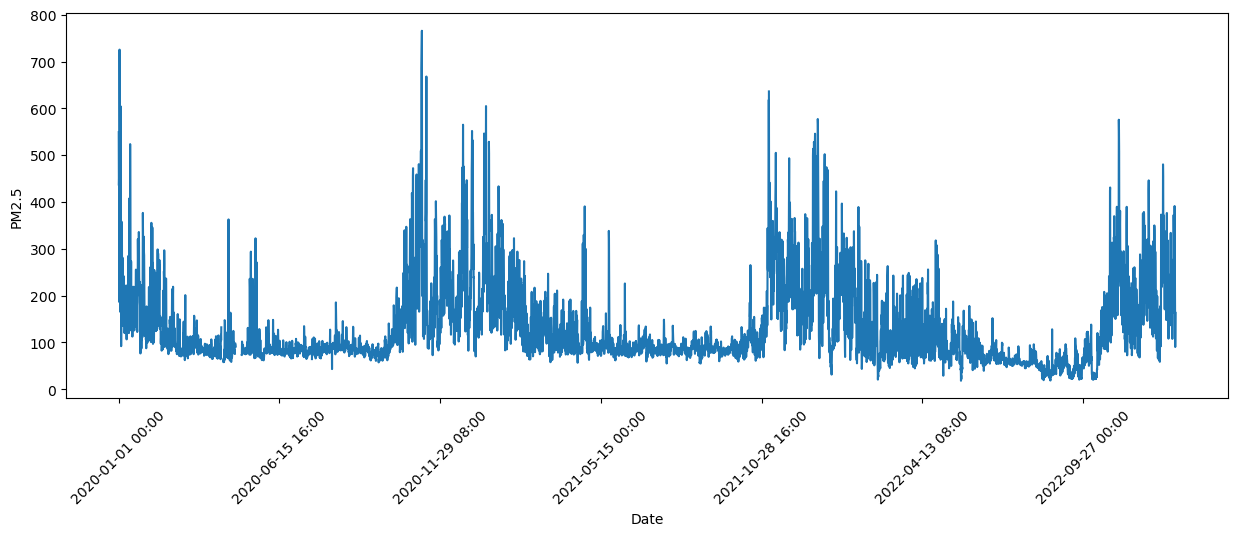

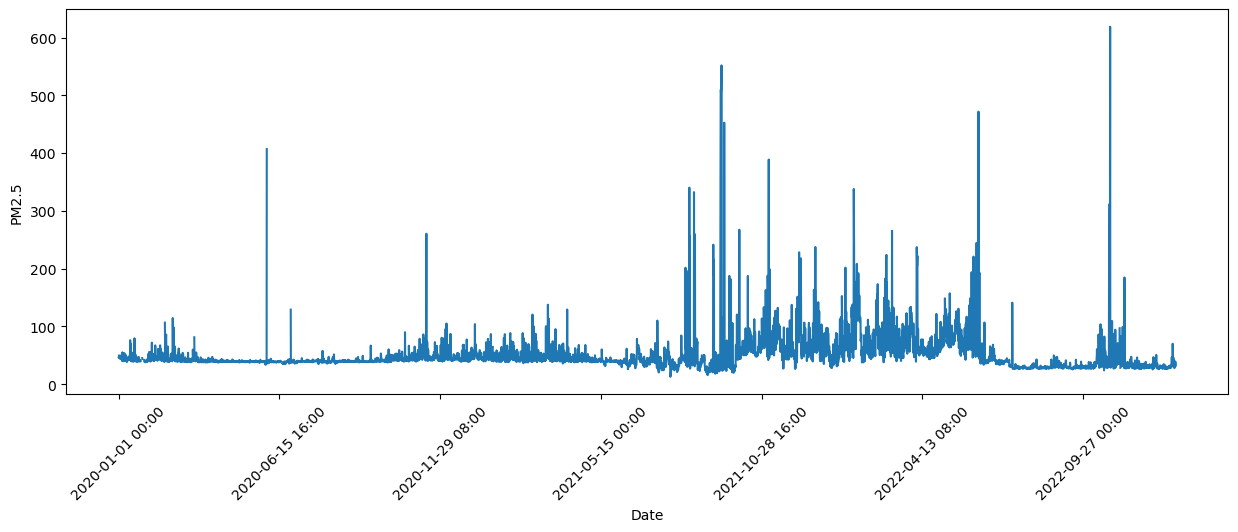

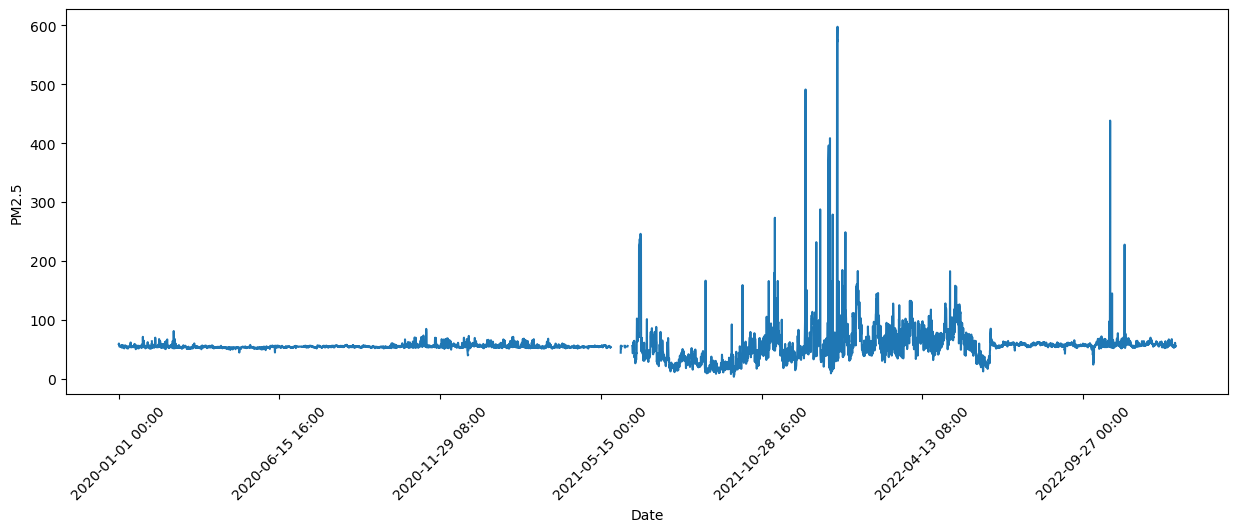

In [46]:
for x in df['City'].unique()[:3]:
    data = df[df['City'] == x]
    plt.figure(figsize=(15,5))
    
    data = data.set_index(data['Time Periods'] , drop = True)
    data['PM2.5'].plot()
    plt.xlabel('Date')
    plt.xticks(rotation= 45)
    plt.ylabel('PM2.5')
    plt.show()

In [47]:
#shape
df.shape

(223584, 45)

In [48]:
#show columns
df.columns

Index(['PM2.5', 'NO', 'NO2', 'NOx', 'NH3', 'SO2', 'CO', 'Ozone', 'Benzene',
       'Toluene', 'Temp', 'RH', 'WS', 'WD', 'SR', 'BP', 'AT', 'RF', 'TOT-RF',
       'VWS', 'Eth-Benzene', 'Xylene', 'MP-Xylene', 'O Xylene', 'CH4', 'City',
       'State', 'Population as of 2021 (Estimated)', 'Latitude', 'Longitude',
       'Total Length of Roads as of 2019(Km)',
       'Length of National Highways as of 2022(Km)',
       'Railway Route as of 2021(Km)', 'Forest Cover as of 2021(sq Km)',
       'Number of Factories as of 2020 (Units)',
       'Installed Capacity of Power as of 2022(Megawatt)',
       'Death Rate as of 2020(Per 1000)', 'CNG ONLY', 'DIESEL',
       'DIESEL/HYBRID', 'ELECTRIC(BOV)', 'PETROL', 'PETROL/CNG',
       'PETROL/HYBRID', 'Time Periods'],
      dtype='object')

In [49]:
#To describe the dataframe
df.describe()

,PM2.5,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,...,Latitude,Longitude,Total Length of Roads as of 2019(Km),Length of National Highways as of 2022(Km),Railway Route as of 2021(Km),Forest Cover as of 2021(sq Km),Number of Factories as of 2020 (Units),Installed Capacity of Power as of 2022(Megawatt),Death Rate as of 2020(Per 1000),DIESEL/HYBRID
count,218044.000000,218735.000000,218244.000000,217612.000000,217948.000000,219700.000000,219762.000000,219154.000000,217487.000000,167030.000000,...,223584.000000,223584.000000,223584.000000,223584.000000,223584.000000,223584.000000,223584.000000,223584.000000,223584.000000,223584.000000
mean,69.213957,14.072135,30.366790,30.736544,26.234892,13.945535,0.987377,31.138962,3.730146,19.040600,...,24.619147,80.321382,286961.117647,7288.029412,4573.882353,21637.235294,11424.088235,20314.823529,5.938235,58.750295
std,56.962718,22.097622,31.883841,31.688403,20.545715,10.851849,0.792493,21.908442,5.709067,24.739317,...,5.056692,5.417350,159073.751285,4531.545100,3094.274920,19508.426850,8986.112066,13297.869679,0.933690,94.245640
min,0.100000,0.010000,0.010000,0.000000,0.100000,0.010000,0.000000,0.030000,0.000000,0.000000,...,8.486000,72.587000,2573.000000,15.000000,13.000000,23.000000,204.000000,225.000000,3.600000,0.000000
25%,30.340937,4.006669,12.175122,13.329495,13.053931,6.357942,0.476443,14.784502,0.872648,2.444047,...,23.026000,77.026000,120034.000000,3620.000000,1703.000000,14818.000000,3892.000000,7323.000000,5.500000,1.000000
50%,51.630955,6.727626,19.174929,21.085326,20.984008,11.360059,0.821914,27.112538,2.198147,8.847500,...,25.519500,78.095000,298205.000000,7257.000000,4212.000000,14872.000000,9694.000000,25385.000000,6.100000,13.000000
75%,91.310000,13.334686,36.976778,35.779768,33.487317,18.810202,1.213776,42.196887,4.028444,23.859738,...,28.411000,83.010000,442907.000000,12245.000000,8799.000000,23659.000000,16184.000000,29230.000000,6.500000,46.000000
max,890.873920,359.241357,300.479696,394.141771,412.902722,195.550000,9.472610,197.200000,205.880300,360.394123,...,34.086000,93.944000,636887.000000,18317.000000,8799.000000,77493.000000,38837.000000,43446.000000,7.900000,457.000000


In [50]:
#checking datatype and information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223584 entries, 0 to 223583
Data columns (total 45 columns):
 #   Column                                            Non-Null Count   Dtype  
---  ------                                            --------------   -----  
 0   PM2.5                                             218044 non-null  float64
 1   NO                                                218735 non-null  float64
 2   NO2                                               218244 non-null  float64
 3   NOx                                               217612 non-null  float64
 4   NH3                                               217948 non-null  float64
 5   SO2                                               219700 non-null  float64
 6   CO                                                219762 non-null  float64
 7   Ozone                                             219154 non-null  float64
 8   Benzene                                           217487 non-null  float64
 9   Tolu

                                        For Duplicate values

In [51]:
#checking for duplicate data
df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
223579    False
223580    False
223581    False
223582    False
223583    False
Length: 223584, dtype: bool

In [52]:
sum(df.duplicated())

0

In [53]:
df.describe()['PM2.5']

count    218044.000000
mean         69.213957
std          56.962718
min           0.100000
25%          30.340937
50%          51.630955
75%          91.310000
max         890.873920
Name: PM2.5, dtype: float64

                                          For Missing values

In [54]:
#Checking for missing values
df.isna().sum()

PM2.5                                                 5540
NO                                                    4849
NO2                                                   5340
NOx                                                   5972
NH3                                                   5636
SO2                                                   3884
CO                                                    3822
Ozone                                                 4430
Benzene                                               6097
Toluene                                              56554
Temp                                                172116
RH                                                   27211
WS                                                    7080
WD                                                    5809
SR                                                   16383
BP                                                   64451
AT                                                   215

In [55]:
#Missing values in PM2.5 are replaced with help of Linear Interpolation method
count = 0
db = df.copy()
for x in df['City'].unique():
    db[db['City']==x] = df[df['City']==x].interpolate()
    
df=db
    

In [56]:
#we still have nan values due to all the values of particular city is nan so interpolation cant be applied
df.isna().sum()

PM2.5                                                  553
NO                                                     517
NO2                                                    517
NOx                                                    862
NH3                                                    516
SO2                                                    516
CO                                                     861
Ozone                                                  516
Benzene                                                346
Toluene                                              47168
Temp                                                170976
RH                                                   20969
WS                                                    1514
WD                                                     854
SR                                                    7318
BP                                                   59660
AT                                                   146

In [57]:
df.head()

,PM2.5,NO,NO2,NOx,NH3,SO2,CO,Ozone,Benzene,Toluene,...,Installed Capacity of Power as of 2022(Megawatt),Death Rate as of 2020(Per 1000),CNG ONLY,DIESEL,DIESEL/HYBRID,ELECTRIC(BOV),PETROL,PETROL/CNG,PETROL/HYBRID,Time Periods
0,549.256878,181.010975,91.247522,188.364425,79.707417,10.175812,3.520142,23.411029,NaN,NaN,...,7617,3.6,"13,968","10,528",32,"12,379","3,60,440","21,424","5,313",2020-01-01 00:00
1,435.438303,194.247049,79.661701,203.481853,66.258913,11.615925,3.464807,29.331609,9.827428,NaN,...,7617,3.6,"13,968","10,528",32,"12,379","3,60,440","21,424","5,313",2020-01-01 04:00
2,453.312378,112.499494,121.740909,153.914993,74.356791,10.590183,2.460498,30.172308,9.085975,NaN,...,7617,3.6,"13,968","10,528",32,"12,379","3,60,440","21,424","5,313",2020-01-01 08:00
3,186.603123,56.922094,114.142207,91.504524,73.426315,12.217971,1.405930,30.493537,3.884649,104.475114,...,7617,3.6,"13,968","10,528",32,"12,379","3,60,440","21,424","5,313",2020-01-01 12:00
4,262.616309,77.363086,123.790340,117.065760,72.495838,13.331616,2.692100,18.045684,5.605006,96.718827,...,7617,3.6,"13,968","10,528",32,"12,379","3,60,440","21,424","5,313",2020-01-01 16:00


In [58]:
#for the rest 553 nan data we replace na by zero
df = df.fillna(0)

In [59]:
#no missing values in the dataset now
df.isna().sum()

PM2.5                                               0
NO                                                  0
NO2                                                 0
NOx                                                 0
NH3                                                 0
SO2                                                 0
CO                                                  0
Ozone                                               0
Benzene                                             0
Toluene                                             0
Temp                                                0
RH                                                  0
WS                                                  0
WD                                                  0
SR                                                  0
BP                                                  0
AT                                                  0
RF                                                  0
TOT-RF                      

                                            Checking Outliers

In [60]:
# Checking for outliers
# Calculating Z-score values
# def detect_outlier(data):

#     thre = 3
#     mean = np.mean(data['PM2.5'])
#     std = np.std(data['PM2.5'])
#     outlier = []
#     for i in data['PM2.5']:
#         z_score = (i - std) / mean
#         if np.abs(z_score) > thre:
#             outlier.append(i)


#     return outlier


In [61]:
# l=[]

# for x in df['City'].unique():

#     outliers = detect_outlier(df[df['City'] == x])
#     df = df[(df['City'] != x) | ((df['City'] == x) & (df['PM2.5'].isin(outliers) == False))]
#     # print(db.tail())

# # df = db
# df = df.reset_index(drop=True)
# print(df.head())

Text(0, 0.5, 'PM2.5')

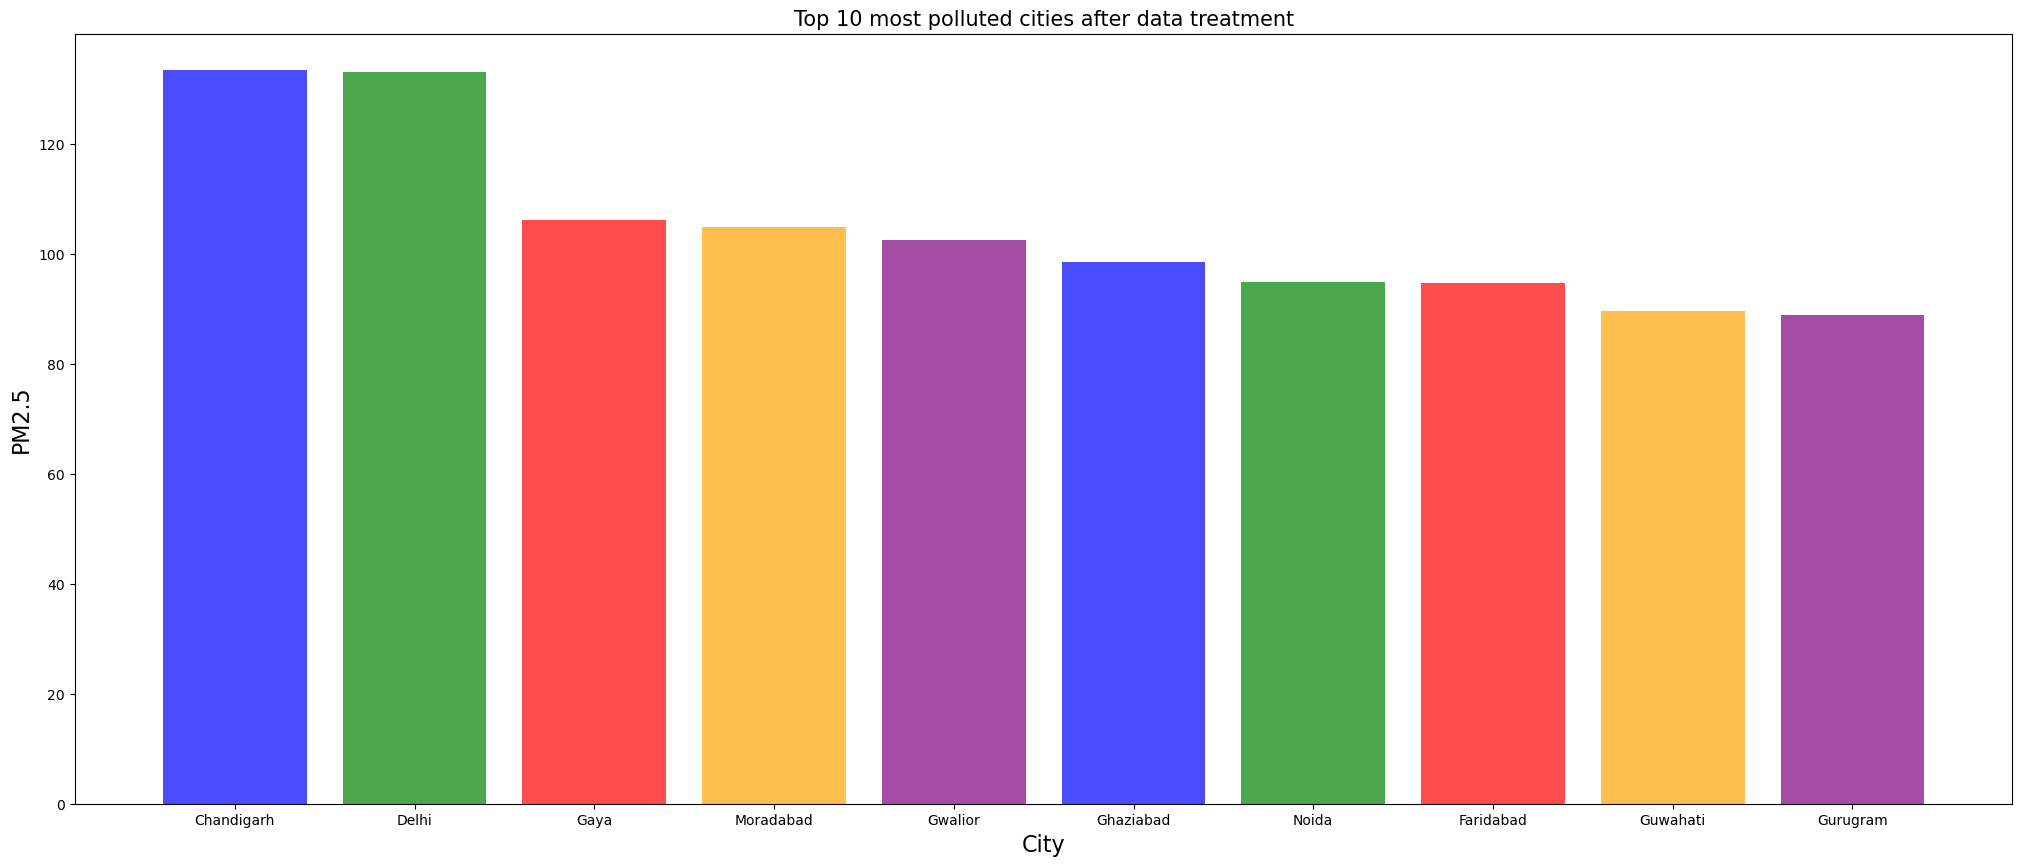

In [62]:
plt.figure(figsize=(25 , 10))
Y = 'PM2.5'
ind = df[[Y, 'City']].groupby('City', as_index=False).mean().sort_values(by=Y,ascending=False)
plt.title("Top 10 most polluted cities after data treatment" , fontsize = 15)
colors = ['blue', 'green', 'red', 'orange', 'purple']
plt.bar(ind['City'][:10] , ind[Y][:10] , color = colors , alpha = 0.7)
plt.xlabel('City' , fontsize=16)
plt.ylabel(Y , fontsize=16)

## Feature Selection

In [63]:
import seaborn as sns

In [64]:
# plt.figure(figsize=(25 ,10))
# cor = df.corr()
# sns.heatmap(cor , annot=True)
# plt.show()

In [65]:
def correlation(dataset, threshold):
    col_corr = []  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    
    for i in range(len(corr_matrix.columns)):
        if (corr_matrix.iloc[i, 0]) > threshold: # we are interested in absolute coeff value
            colname = corr_matrix.columns[i]  # getting the name of column
            col_corr.append(colname)
    return col_corr

In [66]:
# Pearsons's Correlation 

corr_features = correlation(df, 0.6)
len(set(corr_features))
corr_features

['PM2.5']

In [67]:
corr_features.append('City')
corr_features.append('Time Periods')
df = df[corr_features]
df


,PM2.5,City,Time Periods
0,549.256878,Delhi,2020-01-01 00:00
1,435.438303,Delhi,2020-01-01 04:00
2,453.312378,Delhi,2020-01-01 08:00
3,186.603123,Delhi,2020-01-01 12:00
4,262.616309,Delhi,2020-01-01 16:00
...,...,...,...
223579,196.989121,Mumbai,2022-12-31 04:00
223580,187.428487,Mumbai,2022-12-31 08:00
223581,176.635690,Mumbai,2022-12-31 12:00
223582,189.740021,Mumbai,2022-12-31 16:00


In [68]:

# dt.dropna()
# polute = ["PM2.5" , "NO" , "NO2" , "CO" , "NH3" , "NOx"]

# for Y in polute:
#     plt.figure(figsize=(25 , 10)).suptitle(Y)
#     for x in dt['City'].unique()[:5]:
#         data = dt[dt['City'] == x]
#         data['Time Periods']  = pd.to_datetime(data['Time Periods'])
#         data.set_index(data['Time Periods'] , drop = True , inplace = True)
        
        
#         plt.plot(data[Y])
#         plt.legend(x)
#         plt.xlabel('Date')
#         plt.ylabel(Y)

#     plt.show()

#     plt.figure(figsize=(25 , 10)).suptitle(Y)

#     sns.set(style="whitegrid")
#     ind = dt[[Y, 'City']].groupby('City', as_index=False).mean().sort_values(by=Y,ascending=False)
#     plt.bar(ind['City'][:10] , ind[Y][:10])
#     plt.xlabel('City')
#     plt.ylabel(Y)
    

Value of PM2.5 is higher during winters and spring season (Nov - April) of the year while it is comparitively in rest of the months
top 5 polluted = Chandigarh , Delhi , gaya , Moradabad , Gwalior

## ARIMA

In [69]:
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
from pmdarima import auto_arima
import warnings
warnings.filterwarnings("ignore")

In [83]:
def ARIMA(data , x):
    
    data = data['PM2.5']
    # print(data.head(5))

        # check stationarity
        # adfuller_test(data['PM2.5'].dropna())

    # stepwise_fit = auto_arima(data.dropna() , trace=True,suppress_warnings=True)
    # stepwise_fit.summary()

    # plt.suptitle(x)
    # plt.plot(data)
    # plt.show()

    sz = (int)(0.75 * len(data))
    train = data.iloc[:sz]
    test = data.iloc[sz:]

    model = sm.tsa.arima.ARIMA(train,order=(5,1,5))
    model = model.fit()


    s = len(train)
    e = len(train) + len(test) - 1
    pred = model.predict(start=s,end=e,typ='levels')
    pred.index=data.index[s:e+1]
    
    mse = mean_squared_error(test , pred)
    rmse = mse**0.5
    r2 = r2_score(test , pred)
    mae = mean_absolute_error(test , pred)

    return (rmse , r2 , mae)

    # plt.figure(figsize=(15,5))
    # pred.plot(legend=True,figsize=(12,5))
    # test.plot(legend=True,figsize=(12,5))
    # plt.show()
    

# LSTM

In [71]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM
import math

from sklearn.metrics import f1_score
from sklearn.preprocessing import MinMaxScaler

In [72]:
def create_dataset(dataset , timestep):
    dataX , dataY = [] , []
    for i in range(len(dataset) - timestep - 1):
        a = dataset[i:(i + timestep),0]
        dataX.append(a)
        dataY.append(dataset[i+timestep , 0])
    
    return np.array(dataX) , np.array(dataY)

In [73]:
def lstm(data , city):

        df1 = data['PM2.5']

        scaler = MinMaxScaler(feature_range=(0,1))
        df1 = scaler.fit_transform(np.array(df1).reshape(-1,1))

        train_size = int(len(df1) * 0.8)
        test_size = len(df1) - train_size
        train_data,test_data = df1[:train_size,:] , df1[train_size: ,:]
        train_data

        timestep = 7
        X_train , Y_train = create_dataset(train_data,timestep)
        X_test,Y_test = create_dataset(test_data,timestep)
        X_test.shape , Y_test.shape

        X_train = X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
        X_test = X_test.reshape(X_test.shape[0] , X_test.shape[1] , 1)

        model = Sequential()
        model.add(LSTM(50 , return_sequences=True,input_shape=(7 ,1)))
        model.add(LSTM(50 , return_sequences=True))
        model.add(LSTM(50))
        model.add(Dense(1))
        model.compile(loss='mean_squared_error',optimizer='adam',metrics=['mean_squared_error'])
        model.summary()
        model.fit(X_train,Y_train,validation_data=(X_test,Y_test),epochs=7,batch_size=100,verbose=1)

        train_predict = model.predict(X_train)
        test_predict = model.predict(X_test)
        train_predict = scaler.inverse_transform(train_predict)
        test_predict = scaler.inverse_transform(test_predict)
        
        Y_test = Y_test.reshape(-1,1)
        Y_test = scaler.inverse_transform(Y_test)
        # print(Y_test)
        # print(test_predict)

        mse = mean_squared_error(Y_test , test_predict)
        rmse = mse**(0.5)
        r2 = r2_score(Y_test,test_predict)
        mae = mean_absolute_error(Y_test , test_predict)

        # print("rmse for train prediction " , math.sqrt(mean_squared_error(Y_train,train_predict)))
        # print("rmse for test prediction " , math.sqrt(mean_squared_error(Y_test,test_predict)))
        # print("mae" , mean_absolute_error(Y_test,test_predict))
        


        # look_back=10
        # trainPredictPlot = np.empty_like(df1)
        # trainPredictPlot[:, :] = np.nan
        # trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
        # # shift test predictions for plotting
        # testPredictPlot = np.empty_like(df1)
        # testPredictPlot[:, :] = np.nan
        # testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
        # # plot baseline and predictions

        # xaxis = data['Time Periods']
        
        

        # plt.figure(figsize=(15,5))
        # plt.plot(xaxis , scaler.inverse_transform(df1))
        # plt.plot(xaxis , trainPredictPlot)
        # plt.plot(xaxis , testPredictPlot)
        # plt.legend(['Actual' , 'test prediction' , 'train prediction'])
        # plt.xlabel('Dates')
        # plt.ylabel('PM2.5')
        # plt.show()


        # x_input = test_data[len(test_data) - timestep:].reshape(1,-1)
        # x_input.shape 
        # temp_input = list(x_input)
        # temp_input = temp_input[0].tolist()


        # lst_output=[]
        # n_steps=10
        # i=0
        # hours = ['']
        # while(i<18):
        #         if(len(temp_input)>n_steps):
        #                 #print(temp_input)
        #                 x_input=np.array(temp_input[1:])
        #                 # print("{} day input {}".format(i,x_input))
        #                 x_input=x_input.reshape(1,-1)
        #                 x_input = x_input.reshape((1, n_steps, 1))
        #                 #print(x_input)
        #                 yhat = model.predict(x_input, verbose=0)
        #                 # print("{} day output {}".format(i,yhat))
        #                 temp_input.extend(yhat[0].tolist())
        #                 temp_input=temp_input[1:]
        #                 #print(temp_input)
        #                 lst_output.extend(yhat.tolist())
        #                 i=i+1
        #         else:
        #                 x_input = x_input.reshape((1, n_steps,1))
        #                 yhat = model.predict(x_input, verbose=0)
        #                 # print(yhat[0])
        #                 temp_input.extend(yhat[0].tolist())
        #                 # print(len(temp_input))
        #                 lst_output.extend(yhat.tolist())
        #                 i=i+1
    

        
        # # print(lst_output)

        # day_new = np.arange(1,1 + n_steps)
        # day_pred = np.arange(1+n_steps,1+n_steps+18)

        # df3 = df1.tolist()
        # df3.extend(lst_output)

        # plt.figure(figsize=(15,5)).suptitle(city)
        # plt.plot(day_new,scaler.inverse_transform(df1[-10:]))
        # plt.plot(day_pred,scaler.inverse_transform(lst_output))
        # plt.xlabel('Dates')
        # plt.ylabel('PM2.5')
        # plt.show()

        # lst_output = scaler.inverse_transform(lst_output)

        return rmse , r2 , mae
    

In [74]:
import time

In [84]:
count , idx = 0 , 0
table = []

for x in df['City'].unique():

    if count > 0:
        break
    count += 1

    print(x)
    data = df[df['City'] == x] 
    del data['City']     
    data.reset_index(drop = True)  
    data['Time Periods']  = pd.to_datetime(data['Time Periods'])
    data.set_index(data['Time Periods'] , drop = True , inplace = True)  
    print(data.head())

    # print(data)
    

    st = time.time()
    mse , r2 , mae = ARIMA(data , x)
    et = time.time()
    table.append(['ARIMA' , mse , r2 , mae , et - st])

    # st = time.time()
    # mse , r2 , mae = lstm(data , x)
    # et = time.time()
    # table.append(['lstm' , mse , r2 , mae , et - st])

    # st = time.time()
    # mse , r2 , mae = randomforest(data)
    # et = time.time()
    # table.append(['rf' , mse , r2 , mae , et - st])

    # st = time.time()
    # mse , r2 , mae = xgboost(data)
    # et = time.time()
    # table.append(['xgb' , mse , r2 , mae , et - st])

    


T = pd.DataFrame(table , columns=['Model' , 'rmse' , 'R2_score' , 'mae' , 'time (sec)'])
T
    
    # for i in final:
    #     submission['PM2.5_Prediction'][idx] = np.abs(np.round(i,2))
    #     idx += 1
    
    
# submission.to_excel('ready.xlsx')

Delhi
                          PM2.5        Time Periods
Time Periods                                       
2020-01-01 00:00:00  549.256878 2020-01-01 00:00:00
2020-01-01 04:00:00  435.438303 2020-01-01 04:00:00
2020-01-01 08:00:00  453.312378 2020-01-01 08:00:00
2020-01-01 12:00:00  186.603123 2020-01-01 12:00:00
2020-01-01 16:00:00  262.616309 2020-01-01 16:00:00


,Model,rmse,R2_score,mae,time (sec)
0,ARIMA,83.826922,-0.036307,67.657915,10.428498


In [76]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100 , max_features=3 , random_state=1)

In [77]:
def randomforest(data):
    db = data.copy()
    # db.drop(columns=['City'])
    # print(db)
    # db = data.copy()
    # db.drop(columns=['City'])
    # db['l1'] = db['PM2.5'].shift(1)
    # db['l2'] = db['PM2.5'].shift(2)
    # db['l3'] = db['PM2.5'].shift(3)

    # db = db.dropna()

    # x1 , x2 , x3 , y = db['l1'] , db['l2'] , db['l3'] , db['PM2.5']
    # x1 , x2 , x3 , y = np.array(x1) , np.array(x2) , np.array(x3) , np.array(y)
    # x1 , x2 , x3 , y = x1.reshape(-1 , 1) , x2.reshape(-1 , 1) , x3.reshape(-1 , 1) , y.reshape(-1 , 1)
    # final_x = np.concatenate((x1 , x2 , x3) , axis = 1)
    # # print(final_x)

    # t = len(final_x)
    # print(t)
    # t = int((0.7) * (t))
    # x_train , x_test , y_train , y_test = final_x[:t] , final_x[t:] , y[:t] , y[t:]
    # model.fit(x_train , y_train)
    # predict = model.predict(x_test)
    # plt.figure(figsize=(15 , 5))
    
    # plt.plot(predict)
    # plt.plot(y_test)

    # mse = mean_squared_error(y_test , predict)
    # r2 = r2_score(y_test,predict)
    # mae = mean_absolute_error(y_test,predict)
    
    # return (mse , r2 , mae)


    # print(db.head())


    lags = 20  # Number of lag observations
    for i in range(1, lags + 1):
        db[f'lag_{i}'] = db['PM2.5'].shift(i)

    db.dropna(inplace=True)

    train_size = int(len(db) * 0.8)
    train_data, test_data = db[:train_size], db[train_size:]

    X_train, y_train = train_data.drop(['Time Periods', 'PM2.5'], axis=1), train_data['PM2.5']
    X_test, y_test = test_data.drop(['Time Periods', 'PM2.5'], axis=1), test_data['PM2.5']

    rf = RandomForestRegressor(n_estimators=100, random_state=0)

    rf.fit(X_train, y_train)

    y_pred = rf.predict(X_test)

    mse = (mean_squared_error(y_test, y_pred))
    rmse = mse**0.5
    r2 = r2_score(y_test , y_pred)
    mae = mean_absolute_error(y_test , y_pred)
    return (rmse , r2 , mae)



In [78]:
from sklearn.model_selection import train_test_split


In [79]:
def create_feature(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['dayofweek'] = df.index.dayofweek
    df['quarter'] = df.index.quarter
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['dayofyear'] = df.index.dayofyear
    df['dayofmonth'] = df.index.day
    df['weekofyear'] = df.index.isocalendar().week
    return df

In [80]:
def xgboost(data):
    sz = int(len(data)*0.7)
    train = data[:sz]
    test = data[sz:]

    data = create_feature(data)

    train = create_feature(train)
    test = create_feature(test)

    print(train.head())

    FEATURES = ['dayofyear', 'hour', 'dayofweek', 'quarter', 'month', 'year']
    TARGET = 'PM2.5'

    x_train = train[FEATURES]
    y_train = train[TARGET]

    x_test = test[FEATURES]
    y_test = test[TARGET]

    reg = xgb.XGBRegressor(base_score=0.5, booster='gbtree',    
                       n_estimators=1000,
                       early_stopping_rounds=50,
                       objective='reg:linear',
                       max_depth=3,
                       learning_rate=0.01)
    
    reg.fit(x_train, y_train,
        eval_set=[(x_train, y_train), (x_test, y_test)],
        verbose=100)
    

    pred = reg.predict(x_test)
    rmse = mean_squared_error(y_test , pred)
    rmse = rmse**0.5
    r2=r2_score(y_test,pred)
    mae = mean_absolute_error(y_test,pred)

    
    # print(rmse)
    # print(r2)
    plt.figure(figsize=(15 , 5))
    plt.plot(y_test)
    plt.plot(pred)
    plt.show()

    return (rmse , r2 , mae)
    
